In [1]:
%pylab inline 

from __future__ import division

import os
import copy
import warnings

import sep 
import numpy as np 
from astropy.io import fits
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

rcdef = plt.rcParams.copy()

pylab.rcParams['figure.figsize'] = 12, 10
pylab.rcParams['xtick.major.size'] = 8.0
pylab.rcParams['xtick.major.width'] = 2.5
pylab.rcParams['xtick.minor.size'] = 4.0
pylab.rcParams['xtick.minor.width'] = 2.5
pylab.rcParams['ytick.major.size'] = 8.0
pylab.rcParams['ytick.major.width'] = 2.5
pylab.rcParams['ytick.minor.size'] = 4.0
pylab.rcParams['ytick.minor.width'] = 2.5

Populating the interactive namespace from numpy and matplotlib


In [3]:
from hscUtils import random_cmap

In [60]:
def seg2Mask(seg, sigma=6.0, mskMax=1000.0, mskThr=0.01):
    """
    Convert the segmentation array into an array
    
    Parameters: 
        sigma:  Sigma of the Gaussian Kernel
    """
    # Copy segmentation to mask
    msk = copy.deepcopy(seg)
    msk[seg > 0] = 1
    # Convolve the mask image with a gaussian kernel
    mskConv = ndimage.gaussian_filter((msk * mskMax), sigma=(sigma), 
                                      order=0)
    mskBool = mskConv > (mskThr * mskMax)
    mskInt = mskBool.astype(int)
    
    return mskInt

# Test the SEP detecttion and segmentation 

In [4]:
loc = "/Users/songhuang/work/project/slensing/221211/HSC-I/"
imgFile = os.path.join(loc, 'sl_221211_HSC-I_full_img.fits')
img = fits.open(imgFile)[0].data 

In [6]:
img = img.byteswap(True).newbyteorder()
cat, seg = sep.extract(img, 1.0, segmentation_map=True)

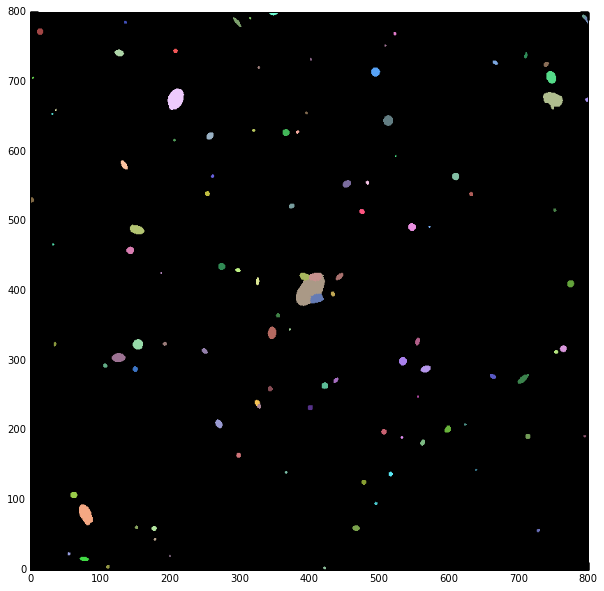

In [8]:
rand_cmap = random_cmap(np.max(seg) + 1, random_state=9037)

ax = plt.subplot(1,1,1)
ax.imshow(seg, origin='lower', cmap=rand_cmap)

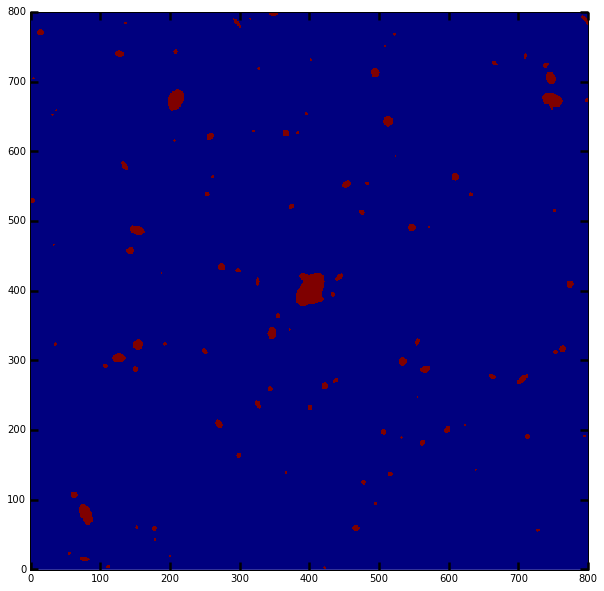

In [12]:
msk = copy.deepcopy(seg)
msk[seg > 0] = 1

plt.imshow(msk, origin='lower', interpolation='none')

# Convolve the Mask

In [53]:
mskMax = 1000.0
mskConv = ndimage.gaussian_filter((msk * mskMax), sigma=(6.0), order=0)

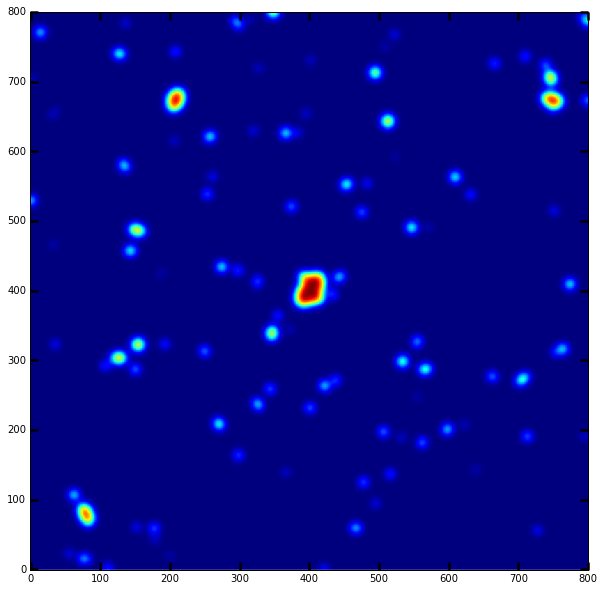

In [54]:
plt.imshow(mskConv, origin='lower', interpolation='none')

In [55]:
np.mean(mskConv), np.median(mskConv)

(12.612199793952946, 0.0)

In [56]:
mskThr = mskMax * 0.01

In [58]:
mskBool = mskConv > mskThr
mskInt = mskBool.astype(int)

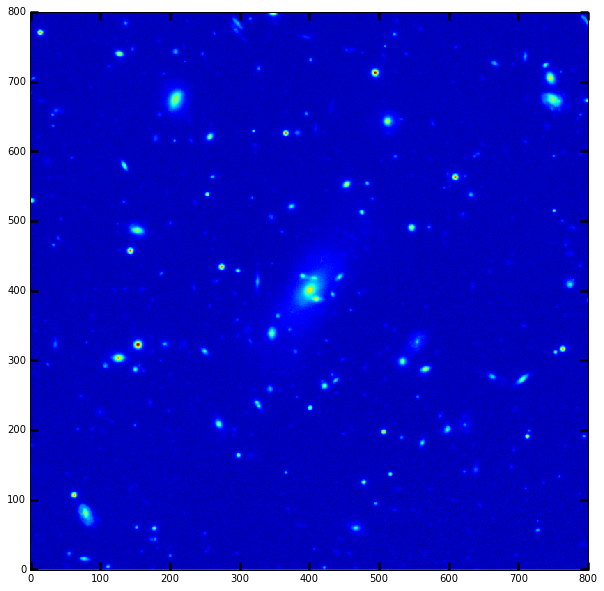

In [63]:
plt.imshow(np.arcsinh(img), origin='lower', interpolation='none')

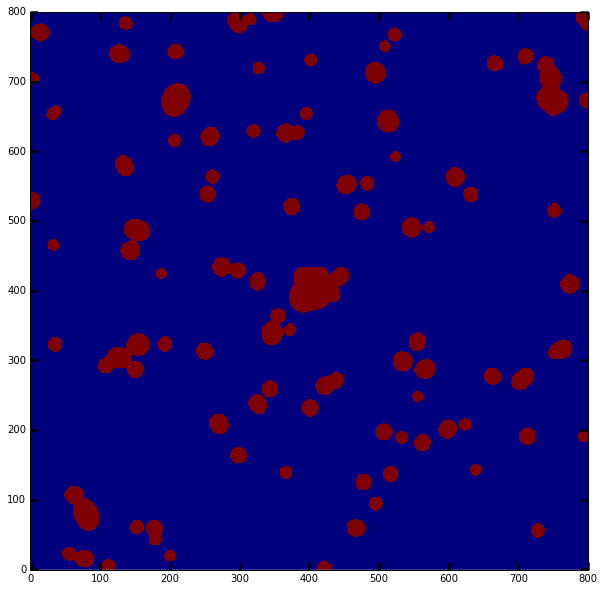

In [65]:
mskTest = seg2Mask(seg, sigma=4.0, mskMax=1000.0, mskThr=0.008)
plt.imshow(mskTest, origin='lower', interpolation='none')

# Remove central object

In [69]:
imgX, imgY = seg.shape
cenX, cenY = (imgX/2.0, imgY/2.0)

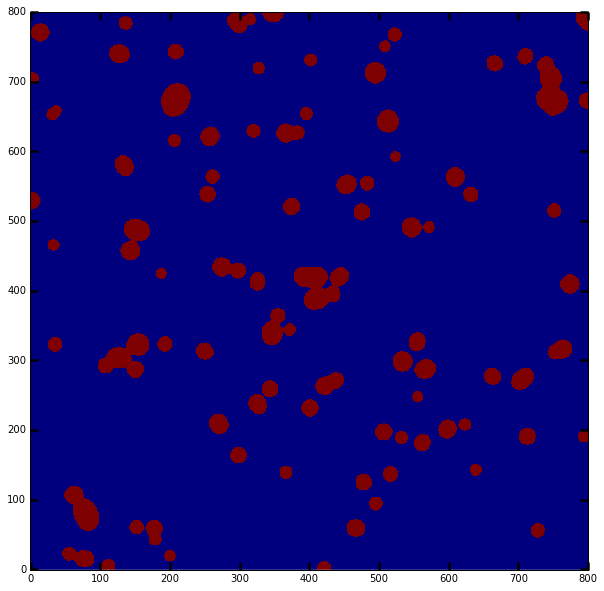

In [73]:
segNew = copy.deepcopy(seg)
segNew[seg == seg[int(cenX), int(cenY)]] = 0

mskNoCen = seg2Mask(segNew, sigma=4.0, mskMax=1000.0, mskThr=0.008)
plt.imshow(mskNoCen, origin='lower', interpolation='none')